# Imports

In [1]:
import os
os.system("pip install funcy pandas numpy scipy seaborn ipywidgets openpyxl wordcloud statsmodels tomark")

0

In [2]:
import pandit as pd
import numpy as np
import funcy as fc
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import requests
import re
from tqdm import tqdm
tqdm.pandas()
from statsmodels.stats.proportion import proportions_ztest
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [24]:
tf.config.list_physical_devices('GPU')

[]

# Loading Data

## Dataset

In [3]:
df_reddit= pd.read_json('https://raw.githubusercontent.com/QuentinTilman/PollBERT-paper/master/Datasets/RedditPoll350K/RedditPoll350K_categorized.json')
df_reddit = df_reddit.rename(columns={'category':'question_topic'})
del df_reddit['Unnamed: 0']

## Preprocessing Word Libraries

In [8]:
stop_words = ["able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","'ve","vol","vols","wed","whats","wheres","whim","whod","whos","widely","words","world","youd","youre"]

In [9]:
r = requests.get("https://raw.githubusercontent.com/dariusk/corpora/master/data/religion/religions.json")
religions = r.json()
beliefs = []
for major in [item for item in religions.values()]:
    majors = [m for m in major]
    beliefs.extend(majors)
    try:
        for minor in major.values():
            for religion in minor:
                beliefs.append(religion)
    except:
        next
beliefs.extend(["atheist","christian","religious","non-religious","not religious"])

In [35]:
r = requests.get("https://raw.githubusercontent.com/Imagin-io/country-nationality-list/master/countries.json")
dictionary = r.json()
df_dictionary = pd.DataFrame(dictionary)
def nation(item):
    item["en_short_name"] = " "+item["en_short_name"].lower()+" "
    item["alpha_2_code"] = " "+item["alpha_2_code"].lower()+" "
    item["alpha_3_code"] = " "+item["alpha_3_code"].lower()+" "
    nationality = re.split(', | or',item["nationality"].lower())
    item["nationality"] = nationality
    return item
df_dictionary=df_dictionary.progress_apply(nation,axis=1)

countries = []
countries.extend(df_dictionary["en_short_name"].values)
countries.extend(df_dictionary["alpha_2_code"].values)
countries.extend(df_dictionary["alpha_3_code"].values)

100%|██████████| 249/249 [00:00<00:00, 5763.44it/s]


In [36]:
nationalities = []
for item in df_dictionary["nationality"].values:
    for label in item:
        nationalities.append(label)

locations = []
locations.extend(df_dictionary["en_short_name"].values)
locations.extend(df_dictionary["alpha_2_code"].values)
locations.extend(df_dictionary["alpha_3_code"].values)
locations.extend([item.lower() for item in ["Asia", "Africa", "North America", "South America", "Antarctica", "Europe", "Australia","rest of the world","usa","us","eu","america",'other country']])

# Preprocessing

## Preprocessing methods

In [10]:
num_choices = 6
choices_names=[f'choice_{i}' for i in range(num_choices)]
mode='proba'

In [11]:
def get_demographics(x):
    parenthesized=[s[s.find("(")+1:s.rfind(")")]  for s in x.options.keys()]
    parenthesized=[s for s in parenthesized if s]
    parenthesized_count=pd.Series.value_counts(parenthesized)
    return list(parenthesized_count[parenthesized_count>1].index)

In [12]:
def split_questions(x):
    demographics=get_demographics(x)

    l=[]
    for d in demographics:
        l+=[fc.project(x.options, [x for x in x.options if f'({d})' in x])] #if row has multiple demographics its repeated in dataset?
    if l:
        x.options=l
        x['split']=True
    else:
        x.options=[x.options]
        x['split']=False
    return x

In [13]:
def extract_demographic(x):
    demographics = get_demographics(x)
    x['demographic']=''
    if not demographics:
        return x
    if len(demographics)>1:
        print('failure:',demographics, x.options)
        return x
    demographic=demographics[0]
    x['options'] = {k.replace(f'({demographic})',''):v for (k,v) in x.options.items()}
    x['demographic']=demographic.lower()
    return x

In [14]:
def preprocess(x):
    choices = (list(x.options.keys())+['']*num_choices)[:num_choices]
    for i,n in enumerate(choices_names):
        x[n]=choices[i]
    scores = np.array(list(x.options.values())+[-1]*num_choices)[:num_choices]*1.0
    if mode=='binary':
        x['label'] = np.random.choice(np.flatnonzero(scores == scores.max()))
    else:
        x['nb_votes'] = scores[scores!=-1].sum()
        scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
        x['label'] = scores
    x['task']=0
    return x

In [15]:
def normalize_nationality(x):
    terms = ["man","guy","and"] + stop_words
    label = x["demographic"].lower()
    if (2 <= len(label) <= 3) and label not in terms:
      if any(token.replace(" ","").lower() in label.split(" ") for token in nationalities):
        token = [token for token  in nationalities if token.replace(" ","").lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
              label = "not "+token[0]
        else:
              label = token[0]
    elif any(token.lower() in label.split(" ") for token in nationalities):
        token = [token for token  in nationalities if token.lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    elif any(token.lower() in label.split("-") for token in nationalities):
        token = [token for token  in nationalities if token.lower() in label.split("-")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
            
    x["demographic"] = label
    return x

In [16]:
def normalize_countries(x):
    terms = ["man","guy","and"] + stop_words
    label = x["demographic"].lower()
    if (2 <= len(label) <= 3) and label not in terms:
      if any(token.replace(" ","").lower() in label.split(" ") for token in countries):
        token = [token for token  in countries if token.replace(" ","").lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
              label = "not "+token[0]
        else:
              label = token[0]
    elif any(token.lower() in label.split(" ") for token in countries):
        token = [token for token  in countries if token.lower() in label.split(" ")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    elif any(token.lower() in label.split("-") for token in countries):
        token = [token for token  in countries if token.lower() in label.split("-")]
        if("not" in label) | ("non" in label):
            label = "not "+token[0]
        else:
            label = token[0]
    x["demographic"] = label
    return x

In [17]:
def normalize_genders(x):
    label = x["demographic"].lower()
    female= ["f","female","woman","chick","girl"]
    male = ["m","male","man","guy","men"]
    if any(token.lower() in female for token in label.split(" ")) | any(token.lower() in female for token in label.split("-")):
        if ("not" in label) | ("non" in label):
            label = "not female"
        else:
            label = "female"
    if any(token in male for token in label.split(" ")) | any(token in male for token in label.split("-")):
        if("not" in label) | ("non" in label):
            label = "not male"
        else:
            label = "male"
    x["demographic"] = label
    return x

In [18]:
def normalize_politics(x):
    label = x["demographic"].lower()
    right = ["d","democratic","right",'right-leaning']
    left = ["republican","republicans","left","left-leaning","r"]
    if any(token.lower() in label.split(" ") for token in right) | any(token.lower() in label.split("-") for token in right):
        if("not" in label) | ("non" in label):
            label = "not democratic"
        else: 
            label = "democratic"
    elif any(token.lower() in label.split(" ") for token in left) | any(token.lower() in label.split("-") for token in left):
        if("not" in label) | ("non" in label):
            label = "not republican"
        else: 
            label = "republican"
    
    x["demographic"] = label
    return x

In [19]:
def to_percentage(x):
    options = x["options"]
    try:
        x["nb_votes"] = sum(options.values())
        x["options"] = {key:(value/sum(options.values())) for key,value in options.items()}
        return x
    except:
        pass

In [20]:
def get_nationality(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(token in demo for token in nationalities):
        category = "nationality"
    x["demographic_category"] = category
    return x

In [21]:
def get_countries(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(token in demo for token in locations):
        category = "location"
    x["demographic_category"] = category
    return x

In [22]:
def get_genders(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    female= ["f","female","woman","chick","girl","women"]
    male = ["m","male","man","guy","boy","men"]
    alphabetplus = [item.lower() for item in ["straight","non-binary","nonbinary","non binary","queer","trans","transgender","Pansexual","asexual","skoliosexual","cisgender","genderqueer","intersex","gay","homosexual","lesbian"]]
    if any(token in female for token in demo.split()):
        category = "gender"
    if any(token in male for token in demo.split()):
        category = "gender"
    if any(token in alphabetplus for token in demo.split()):
        category = "gender"
    x["demographic_category"] = category
    return x

In [23]:
def get_politics(x):
    demo = x["demographic"]
    category = x["demographic_category"]

    right = ["d","democratic","right","r",'right-leaning',"liberal","democrat","right-wing"]
    left = ["republican","republicans","left","left-leaning","conservative","left-wing"]
    if any(token in demo.split(" ") for token in right):
        category = "politics"
    if any(token in demo.split(" ") for token in left):
        category = "politics"
    x["demographic_category"] = category
    return x

In [24]:
def get_diet(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    diets = ["vegan","vegetarian","meat-eater"]
    if any(token in demo.split(" ") for token in diets):
        category = "diet"
    x["demographic_category"] = category
    return x

In [25]:
def has_digit(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if re.search(r'\d+', demo):
            category = "digit "+demo
    x["demographic_category"] = category
    return x

In [26]:
def get_years(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if re.search(r'\d+', demo):
            if 2023 > int(re.search(r'\d+', demo).group()) > 1000:
                category = "years"
    x["demographic_category"] = category
    return x

In [27]:
def get_age(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if (str(category) != "nan"):
        if("digit" in category):
            if any(item in demo for item in ["y/o",">","<","+","below","under","over","years","yo","y.o","younger","older","born",'student','teenager',"adult",'gen z','gen y','gen x']):
                category = "age"
    x["demographic_category"] = category
    return x

In [28]:
def get_ethnicity(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    colours = ["white","black","caucasian","dusky","orange-colored","yellow","red","indian","malay","mongoloid","carib","nergoid"]
    if any(colour in demo for colour in colours):
        category = "ethnicity"
    x['demographic_category'] = category
    return x

In [29]:
def get_belief(x):
    demo = x["demographic"]
    category = x["demographic_category"]
    if any(b in demo for b in beliefs):
        category = "belief"
    x["demographic_category"] = category
    return x

In [30]:
def get_other(x):
    category = x["demographic_category"]
    if str(category) == "nan" or "digit" in category:
        category = "other"
    x["demographic_category"] = category
    return x

## Applying Preprocessing

In [31]:
df_reddit_split=df_reddit.progress_apply(split_questions,axis=1).explode('options')

100%|██████████| 312306/312306 [08:26<00:00, 617.20it/s]


In [32]:
df_reddit_split=df_reddit_split.progress_apply(extract_demographic,axis=1)

 10%|▉         | 31971/322543 [00:42<06:59, 692.86it/s]

failure: ['165 cm', "165 cm) - 6' (183 cm"] {'< 5\' 5" (165 cm), Male': 14, '< 5\' 5" (165 cm), Female': 34, '5\' 5" (165 cm) - 6\' (183 cm), Male': 106, '5\' 5" (165 cm) - 6\' (183 cm), Female': 36}
failure: ["165 cm) - 6' (183 cm", '183 cm'] {'5\' 5" (165 cm) - 6\' (183 cm), Male': 106, '5\' 5" (165 cm) - 6\' (183 cm), Female': 36, "> 6' (183 cm), Male": 65, "> 6' (183 cm), Female": 4}


100%|██████████| 322543/322543 [07:36<00:00, 706.96it/s]


In [33]:
df_reddit_demo = df_reddit_split[df_reddit_split.demographic.map(len).map(bool)]

In [37]:
df_reddit_demographics_normalized_labels=df_reddit_demo.progress_apply(normalize_nationality,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_genders,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_countries,axis=1)
df_reddit_demographics_normalized_labels=df_reddit_demographics_normalized_labels.progress_apply(normalize_politics,axis=1)

100%|██████████| 20214/20214 [00:02<00:00, 8846.65it/s] 


In [38]:
df_reddit_percentage = df_reddit_demographics_normalized_labels.progress_apply(preprocess,axis=1)
df_reddit_percentage = df_reddit_percentage.dropna()

  5%|▍         | 968/20214 [00:05<01:42, 188.46it/s]C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1992557237.py:10: RuntimeWarning: invalid value encountered in divide
  scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
  5%|▌         | 1026/20214 [00:06<01:41, 189.00it/s]C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1992557237.py:10: RuntimeWarning: invalid value encountered in divide
  scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
  7%|▋         | 1423/20214 [00:08<01:51, 168.48it/s]C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1992557237.py:10: RuntimeWarning: invalid value encountered in divide
  scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
  9%|▉         | 1781/20214 [00:10<01:36, 190.45it/s]C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1992557237.py:10: RuntimeWarning: invalid value encountered in divide
  scores[scores!=-1]= scores[scores!=-1]/scores[scores!=-1].sum()
 10%|▉         | 2001/20214 [00:11<01:34, 193.27i

In [39]:
df_reddit_percentage["demographic_category"] = np.NaN
df_reddit_category = df_reddit_percentage.progress_apply(has_digit,axis=1)
df_reddit_category = df_reddit_category.progress_apply(get_age,axis=1)
df_reddit_category = df_reddit_category.progress_apply(get_years,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_nationality,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_genders,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_countries,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_politics,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_diet,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_ethnicity,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_belief,axis=1)
df_reddit_category=df_reddit_category.progress_apply(get_other,axis=1)

100%|██████████| 20214/20214 [00:01<00:00, 10539.48it/s]


#### Model

@inproceedings{antypas-etal-2022-twitter,
    title = "{T}witter Topic Classification",
    author = "Antypas, Dimosthenis  and
      Ushio, Asahi  and
      Camacho-Collados, Jose  and
      Silva, Vitor  and
      Neves, Leonardo  and
      Barbieri, Francesco",
    booktitle = "Proceedings of the 29th International Conference on Computational Linguistics",
    month = oct,
    year = "2022",
    address = "Gyeongju, Republic of Korea",
    publisher = "International Committee on Computational Linguistics",
    url = "https://aclanthology.org/2022.coling-1.299",
    pages = "3386--3400"
}

In [57]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

In [58]:
def get_topic_label(x):
    try:
        text = x["title"]
        tokens = tokenizer(text, return_tensors='pt')
        output = model(**tokens)

        scores = output[0][0].detach().numpy()
        scores = expit(scores)
        x["question_topic"] = class_mapping[scores.argmax()]
    except:
        x["question_topic"] = "other"
    return x

# Data Visualisation

## Examples per demographic category

In [59]:
ratio_demographic = len(df_reddit_category)/len(df_reddit)
ratio_demographic

0.06472498126837141

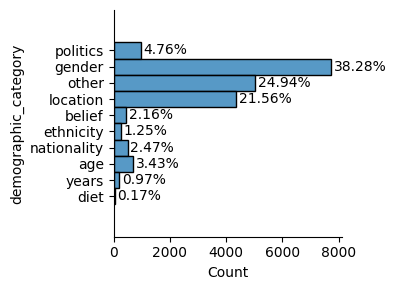

In [60]:
fg = sns.displot(data=df_reddit_category, y='demographic_category', stat='count', height=3, aspect=1.25)

for ax in fg.axes.ravel():
    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.2f}%' if (w := (v.get_width()/len(df_reddit_category))*100) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, rotation=0, padding=2)
    
    ax.margins(y=0.2)
fg.tick_params(labelsize=10)
plt.show()

In [61]:
df_reddit_category.drop(df_reddit_category[df_reddit_category["demographic_category"] == "other"].index,inplace=True)

In [62]:
counts = df_reddit_category["demographic"].value_counts()
keys = [k for k in df_reddit_category["demographic"].value_counts().keys() if counts[k] > 50]
df_reddit_category_reduced = pd.DataFrame([item for item in df_reddit_category.values if item[6] in keys],columns = df_reddit_category.columns)

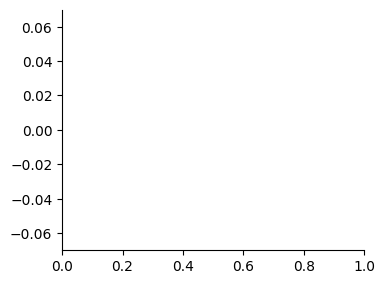

In [63]:
fg = sns.displot(data=df_reddit_category_reduced, y='demographic_category', stat='count', height=3, aspect=1.25)

for ax in fg.axes.ravel():
    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.2f}%' if (w := (v.get_width()/len(df_reddit_category_reduced))*100) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, rotation=0, padding=2)
    
    ax.margins(y=0.2)
fg.tick_params(labelsize=10)
plt.show()

## Examples per Question Topics

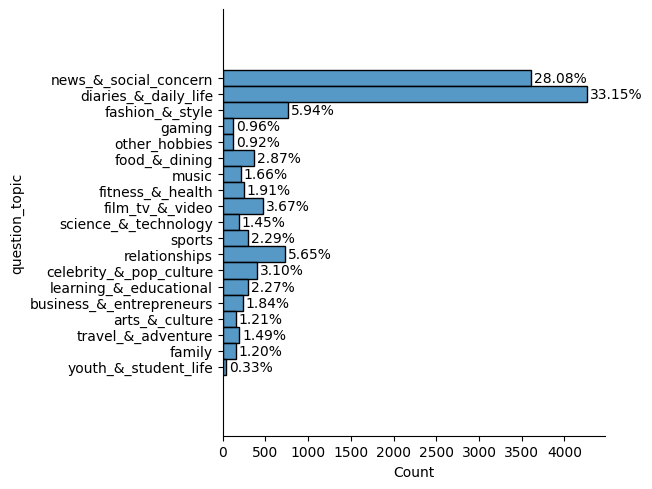

In [64]:
fg = sns.displot(data=df_reddit_category, y='question_topic', stat='count', height=5, aspect=1.25)

for ax in fg.axes.ravel():
    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.2f}%' if (w := (v.get_width()/len(df_reddit_category))*100) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, rotation=0, padding=2)
    
    ax.margins(y=0.2)
fg.tick_params(labelsize=10)
plt.show()

## WordCloud

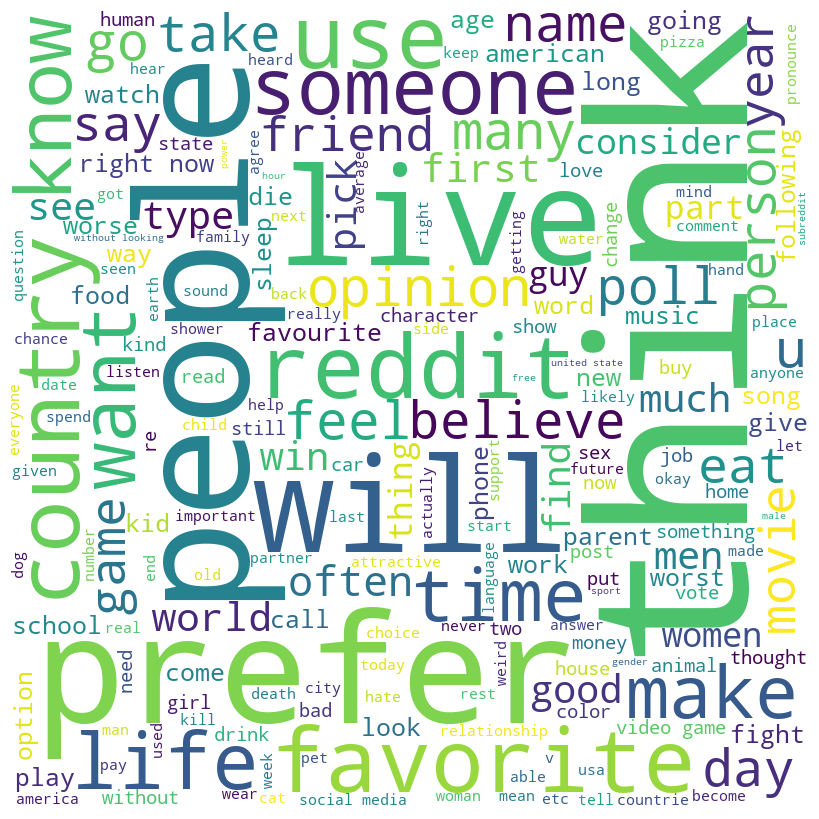

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords = stopwords.union({"choose","rather","better","best","one","S"})
# iterate through the csv file
for val in df_reddit["title"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

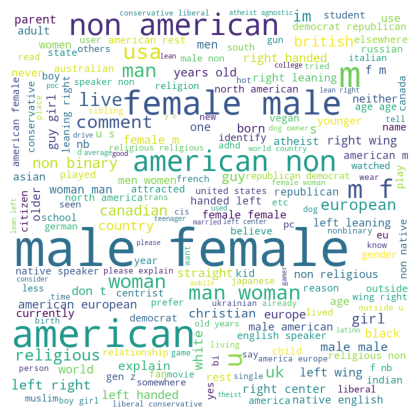

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_reddit_demo["demographic"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Demographic divisiveness Test

In [145]:
df_reddit_category["demographic"].value_counts()

male                                      3782
female                                    3640
american                                  1156
not american                               815
other                                      636
                                          ... 
i know and have heard both those songs       1
i am a sensitive person                      1
i'm not a sensitive person                   1
i have 3 or less siblings                    1
other reason                                 1
Name: demographic, Length: 5224, dtype: int64

In [40]:
def test(x,year,dictionary_demo_question):
    demographics = list(x["demographic"])
    for i in range(len(demographics)):
        dictionary_demo_question[(year,demographics[i])].append(list(x["title"])[i])
    return x

def to_year(x):
    x["created"] = pd.to_datetime(x["created"], unit='s').year
    return x

In [41]:
df_reddit_p_value = df_reddit_category.progress_apply(to_year,axis=1)

100%|██████████| 20214/20214 [00:08<00:00, 2479.64it/s]


In [42]:
df_reddit_p_value.drop(df_reddit_p_value[df_reddit_p_value["demographic_category"] == "other"].index,inplace=True)

In [43]:
counts = df_reddit_p_value["demographic"].value_counts()
keys = [k for k in df_reddit_p_value["demographic"].value_counts().keys() if counts[k] > 50]
df_reddit_category_reduced = pd.DataFrame([item for item in df_reddit_p_value.values if item[6] in keys],columns = df_reddit_p_value.columns)

In [44]:
years = df_reddit_category_reduced["created"].value_counts().keys()

In [45]:
dictionary_demo_question = {}
for y in years:
    for key in df_reddit_category_reduced[df_reddit_category_reduced["created"] == y]["demographic"].value_counts().keys():
        dictionary_demo_question[(y,key)] = []
for y in years:
    df_reddit_category_reduced_choices = df_reddit_category_reduced[df_reddit_category_reduced["created"] == y].groupby(["title"]).apply(test,y,dictionary_demo_question)

C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1583712226.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_reddit_category_reduced_choices = df_reddit_category_reduced[df_reddit_category_reduced["created"] == y].groupby(["title"]).apply(test,y,dictionary_demo_question)
C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1583712226.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To ad

In [46]:
demo_pair_questions = {}
for yk,k in dictionary_demo_question.keys():
    for yl,l in dictionary_demo_question.keys():
        if(yk == yl):
            if(k != l):
                s = set(dictionary_demo_question[(yk,k)]).intersection(set(dictionary_demo_question[(yl,l)]))
                if(len(s) != 0):
                        if((yk,l,k) not in demo_pair_questions.keys()):
                            demo_pair_questions[(yk,k,l)] = s

In [47]:
df_demo_pair_questions = []
for ((y,a,b),vs) in demo_pair_questions.items():
    for v in vs:
        df_demo_pair_questions.append({"year":y,"demoA":a,"demoB":b,"question":v})

In [67]:
def get_p_value(x):
    year = x["year"]
    demoA = x["demoA"]
    demoB = x["demoB"]
    question = x["question"]
    try:
        df_y = df_reddit_category_reduced[df_reddit_category_reduced['created'] == year]

        df_a = df_y[df_y['demographic'] == demoA]
        df_a = df_a[df_a['title'] == question]

        choice_key = list(df_reddit_category["options"].values[0].keys())[0]

        nA = df_a["nb_votes"].values[0]
        v_choice0_a = df_a["options"].values[0][choice_key]
        propA = v_choice0_a

        df_b = df_y[df_y['demographic'] == demoB]
        df_b = df_b[df_b['title'] == question]

        nB = df_b["nb_votes"].values[0]
        

        v_choice0_b = df_b["options"].values[0][choice_key]
        propB = v_choice0_b
    
        stats, p_value = proportions_ztest([propA,propB], [nA,nB], value=None, alternative='two-sided', prop_var=False)
        x["p_value"] = p_value
    except:
        pass
    return x

In [70]:
df_demo_pair_questions_p = pd.DataFrame(df_demo_pair_questions).progress_apply(get_p_value,axis = 1)

 83%|████████▎ | 3478/4210 [00:45<00:09, 78.84it/s] c:\Users\Quent\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\proportion.py:1005: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
c:\Users\Quent\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\proportion.py:1021: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)
 84%|████████▍ | 3533/4210 [00:46<00:07, 84.74it/s]c:\Users\Quent\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\proportion.py:1005: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
c:\Users\Quent\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\proportion.py:1021: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)
 91%|█████████ | 3835/4210 [00:49<00:03, 95.07it/s] c:\Users\Quent\AppData\Local\Programs\Python\Python39\lib\site-packages\stats

In [79]:
df_demo_pair_questions_p = df_demo_pair_questions_p.dropna(subset=["p_value"])

In [143]:
q = 'Do you know what discharge from a female body is?'
demographic_A = "female"
demographic_B = "male"
y = 2021

df_reddit_raw_norm = df_reddit_p_value[df_reddit_p_value["title"] == q]
df_reddit_raw_norm = df_reddit_raw_norm[df_reddit_raw_norm["created"] == y]

df_reddit_raw_norm_A = df_reddit_raw_norm[df_reddit_raw_norm["demographic"] == demographic_A] 
df_reddit_raw_norm_B = df_reddit_raw_norm[df_reddit_raw_norm["demographic"] == demographic_B] 

A = df_reddit_raw_norm_A
B = df_reddit_raw_norm_B
pd.concat([A,B])

,id,title,options,created,question_topic,split,demographic,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,nb_votes,label,task,demographic_category
168954,qkth9j,Do you know what discharge from a female body is?,"{'Yes ': 25, 'No ': 1}",2021,diaries_&_daily_life,True,female,Yes,No,,,,,26.0,"[0.9615384615384616, 0.038461538461538464, -1....",0,gender
168954,qkth9j,Do you know what discharge from a female body is?,"{'Yes ': 29, 'No ': 19}",2021,diaries_&_daily_life,True,male,Yes,No,,,,,48.0,"[0.6041666666666666, 0.3958333333333333, -1.0,...",0,gender


In [138]:
df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] == "female"]

C:\Users\Quent\AppData\Local\Temp\ipykernel_7200\1699638097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] == "female"]


,demoA,demoB,p_value,question,year
4,male,female,7.348708e-15,Do you play video games?,2022
12,male,female,6.047038e-03,"In your experience, are the girls you know cut...",2022
17,male,female,2.003182e-11,Should men’s bathrooms have baby changing stat...,2022
20,male,female,2.904398e-05,Do you have a partner?,2022
34,male,female,2.760738e-03,do you think women should have the right to be...,2022
...,...,...,...,...,...
3416,male,female,3.603395e-04,Can you masturbate to inanimate nsfw pictures?,2021
3425,male,female,6.980727e-03,Is it ok to say no to watching Christmas movie...,2021
3439,male,female,9.622298e-09,Do you find people with musical talent attract...,2021
3452,male,female,9.507938e-04,Do you know what discharge from a female body is?,2021


In [287]:
def merge_demo(x):
    demoA = x["demoA"]
    demoB = x["demoB"]
    x["demo_pair"] = (demoA,demoB)
    return x
df_demo_pair_questions_p=df_demo_pair_questions_p.progress_apply(merge_demo,axis=1)

100%|██████████| 2093/2093 [00:01<00:00, 1077.67it/s]


In [308]:
significant_percentage = []
for key in df_demo_pair_questions_p["demo_pair"].value_counts().keys():
    significant = len(pd.DataFrame(df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demo_pair"] == key]))
    total = len(df_demo_pair_questions_p[df_demo_pair_questions_p["demo_pair"] == key])
    demoA, demoB = key
    significant_percentage.append({"demographic_A": demoA, "demographic_B":demoB,"# p-value < 0.01": significant, "total in common": total })


C:\Users\Quent\AppData\Local\Temp\ipykernel_29632\2929411017.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  significant = len(pd.DataFrame(df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demo_pair"] == key]))


In [305]:
significant_percentage

{('male', 'female'): 0.3083149374540103,
 ('american', 'not american'): 0.42289719626168226,
 ('female', 'male'): 0.23529411764705882,
 ('republican', 'democratic'): 0.32142857142857145,
 ('male', 'non-binary'): 0.1590909090909091,
 ('female', 'non-binary'): 0.09523809523809523,
 ('male', 'women'): 0.32,
 ('american', 'european'): 0.3333333333333333,
 ('not american', 'republican'): 0.16666666666666666,
 ('female', 'religious'): 0.0,
 ('male', 'religious'): 0.5,
 ('european', ' usa '): 1.0,
 ('non-binary', 'women'): 1.0,
 ('not american', 'european'): 0.0,
 ('not american', 'democratic'): 1.0,
 ('female', 'women'): 1.0,
 ('women', 'non-binary'): 0.0,
 ('male', 'democratic'): 1.0,
 ('not american', ' usa '): 0.0,
 ('male', 'american'): 0.0,
 ('female', 'under 18'): 1.0,
 ('female', 'democratic'): 1.0,
 ('female', 'republican'): 0.0,
 ('female', 'american'): 0.0,
 ('male', 'under 18'): 1.0,
 ('male', 'republican'): 0.0}

In [303]:
os.system("pip install tomark")
from tomark import Tomark

In [310]:
print(Tomark.table(significant_percentage))

| demographic_A | demographic_B | # p-value < 0.01 | total in common |
|-----|-----|-----|-----|
| male | female | 419 | 1359 |
| american | not american | 181 | 428 |
| female | male | 24 | 102 |
| republican | democratic | 18 | 56 |
| male | non-binary | 7 | 44 |
| female | non-binary | 4 | 42 |
| male | women | 8 | 25 |
| american | european | 4 | 12 |
| not american | republican | 1 | 6 |
| female | religious | 0 | 2 |
| male | religious | 1 | 2 |
| european |  usa  | 1 | 1 |
| non-binary | women | 1 | 1 |
| not american | european | 0 | 1 |
| not american | democratic | 1 | 1 |
| female | women | 1 | 1 |
| women | non-binary | 0 | 1 |
| male | democratic | 1 | 1 |
| not american |  usa  | 0 | 1 |
| male | american | 0 | 1 |
| female | under 18 | 1 | 1 |
| female | democratic | 1 | 1 |
| female | republican | 0 | 1 |
| female | american | 0 | 1 |
| male | under 18 | 1 | 1 |
| male | republican | 0 | 1 |



| demographic_A | demographic_B | # p-value < 0.01 | total in common |
|-----|-----|-----|-----|
| male | female | 419 | 1359 |
| american | not american | 181 | 428 |
| female | male | 24 | 102 |
| republican | democratic | 18 | 56 |
| male | non-binary | 7 | 44 |
| female | non-binary | 4 | 42 |
| male | women | 8 | 25 |
| american | european | 4 | 12 |
| not american | republican | 1 | 6 |
| female | religious | 0 | 2 |
| male | religious | 1 | 2 |
| european |  usa  | 1 | 1 |
| non-binary | women | 1 | 1 |
| not american | european | 0 | 1 |
| not american | democratic | 1 | 1 |
| female | women | 1 | 1 |
| women | non-binary | 0 | 1 |
| male | democratic | 1 | 1 |
| not american |  usa  | 0 | 1 |
| male | american | 0 | 1 |
| female | under 18 | 1 | 1 |
| female | democratic | 1 | 1 |
| female | republican | 0 | 1 |
| female | american | 0 | 1 |
| male | under 18 | 1 | 1 |
| male | republican | 0 | 1 |

In [301]:
print("{:<20} {:<20} {:<10}".format("demoA", "demoB", "perc"))
for (demoA,demoB), value in significant_percentage.items():
    perc = value
    
    print("{:<20} {:<20} {:<10}".format(demoA, demoB, perc))

demoA                demoB                perc      
male                 female               0.3083149374540103
american             not american         0.42289719626168226
female               male                 0.23529411764705882
republican           democratic           0.32142857142857145
male                 non-binary           0.1590909090909091
female               non-binary           0.09523809523809523
male                 women                0.32      
american             european             0.3333333333333333
not american         republican           0.16666666666666666
female               religious            0.0       
male                 religious            0.5       
european              usa                 1.0       
non-binary           women                1.0       
not american         european             0.0       
not american         democratic           1.0       
female               women                1.0       
women                non-binar

In [262]:
pd.DataFrame(df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01]).to_json("RedditPoll350K_significant_divisiveness_questions.json")

In [270]:
len(df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] == "female"])/len(df_demo_pair_questions_p[df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] =="female"] )

C:\Users\Quent\AppData\Local\Temp\ipykernel_29632\178271062.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_demo_pair_questions_p[df_demo_pair_questions_p["p_value"] < 0.01][df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] == "female"])/len(df_demo_pair_questions_p[df_demo_pair_questions_p["demoA"] == "male"][df_demo_pair_questions_p["demoB"] =="female"] )


0.3083149374540103

In [4]:
df_demo_pair_questions_p = pd.read_json("RedditPoll350K_significant_divisiveness_questions.json")

In [5]:
df_demo_pair_questions_p

,year,demoA,demoB,question,p_value
2,2022,male,female,Have you been diagnosed with a mental illness/...,3.174800e-06
10,2022,male,female,Do you own a Nintendo Switch?,1.078451e-03
23,2022,male,female,Do you become a lil wary or cautious if a woma...,8.000000e-10
58,2022,male,female,Are you depressed or struggling with a mental ...,1.819644e-03
61,2022,male,female,Have you ever been told to respect the other g...,4.434401e-77
...,...,...,...,...,...
4178,2020,american,not american,Do you watch New Year’s Eve Drop Ball on Live TV?,4.187018e-04
4184,2020,american,not american,Do you watch American football?,0.000000e+00
4187,2020,american,not american,Does American food taste over salted?,7.056990e-05
4189,2020,american,not american,Are Americans too loving of their flag?,4.989722e-24
